In [127]:
import pandas as pd
import numpy as np 

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [129]:
date = pd.read_csv(r"D:\C7 Input Files\dataset\dim_date.csv")
district = pd.read_csv(r"D:\C7 Input Files\dataset\dim_districts.csv")
stamps = pd.read_csv(r"D:\C7 Input Files\dataset\fact_stamps.csv")

In [130]:
date.head()

,month,Mmm,quarter,fiscal_year
0,2019-04-01,Apr,Q1,2019
1,2019-05-01,May,Q1,2019
2,2019-06-01,Jun,Q1,2019
3,2019-07-01,Jul,Q2,2019
4,2019-08-01,Aug,Q2,2019


In [131]:
date.tail()

,month,Mmm,quarter,fiscal_year
43,2022-11-01,Nov,Q3,2022
44,2022-12-01,Dec,Q3,2022
45,2023-01-01,Jan,Q4,2022
46,2023-02-01,Feb,Q4,2022
47,2023-03-01,Mar,Q4,2022


In [132]:
date['month'] = pd.to_datetime(date['month'])

In [133]:
date['fiscal_year'] = pd.to_datetime(date['fiscal_year'].astype(str) + '-04-01')

In [134]:
district.head()

,dist_code,district
0,19_1,Adilabad
1,22_2,Bhadradri Kothagudem
2,21_1,Hanumakonda
3,16_1,Hyderabad
4,20_2,Jagtial


In [135]:
stamps.head(5)

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev
0,14_1,2019-04-01,4533,59236363,0,0
1,17_3,2019-04-01,4151,41508762,0,0
2,20_3,2019-04-01,2116,23674170,0,0
3,21_5,2019-04-01,1089,15915285,0,0
4,23_1,2019-04-01,6133,82593256,0,0


In [136]:
stamps['month'] = pd.to_datetime(stamps['month'])

In [137]:
#lets analyse the stamps table
merged_stamp = pd.merge(district, stamps, on='dist_code', how='outer')
merged_stamp

,dist_code,district,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev
0,19_1,Adilabad,2019-04-01,1043.0,12672655.0,0.0,0.0
1,19_1,Adilabad,2019-05-01,1092.0,15177385.0,0.0,0.0
2,19_1,Adilabad,2019-06-01,824.0,11443194.0,0.0,0.0
3,19_1,Adilabad,2019-07-01,1186.0,17853370.0,0.0,0.0
4,19_1,Adilabad,2019-08-01,1124.0,14955291.0,0.0,0.0
...,...,...,...,...,...,...,...
1500,23_3,Yadadri Bhuvanagiri,2022-11-01,5334.0,166902177.0,5476.0,168772405.0
1501,23_3,Yadadri Bhuvanagiri,2022-12-01,5176.0,167334275.0,5312.0,166377762.0
1502,23_3,Yadadri Bhuvanagiri,2023-01-01,4676.0,155087383.0,5032.0,197930372.0
1503,23_3,Yadadri Bhuvanagiri,2023-02-01,4932.0,259411612.0,5061.0,259392115.0


In [138]:
# Second merge: Merge merged_df (result of first merge) with df3
merged_stamp_reg = merged_stamp.merge(date, on='month', how='outer')

In [139]:
merged_stamp_reg.head()

,dist_code,district,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,Mmm,quarter,fiscal_year
0,19_1,Adilabad,2019-04-01,1043.0,12672655.0,0.0,0.0,Apr,Q1,2019-04-01
1,22_2,Bhadradri Kothagudem,2019-04-01,542.0,12610700.0,0.0,0.0,Apr,Q1,2019-04-01
2,21_1,Hanumakonda,2019-04-01,4186.0,120047007.0,0.0,0.0,Apr,Q1,2019-04-01
3,16_1,Hyderabad,2019-04-01,5268.0,724238098.0,0.0,0.0,Apr,Q1,2019-04-01
4,20_2,Jagtial,2019-04-01,1943.0,26031616.0,0.0,0.0,Apr,Q1,2019-04-01


In [140]:
merged_stamp_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   dist_code                 1505 non-null   object        
 1   district                  1505 non-null   object        
 2   month                     1505 non-null   datetime64[ns]
 3   documents_registered_cnt  1504 non-null   float64       
 4   documents_registered_rev  1504 non-null   float64       
 5   estamps_challans_cnt      1504 non-null   float64       
 6   estamps_challans_rev      1504 non-null   float64       
 7   Mmm                       1505 non-null   object        
 8   quarter                   1505 non-null   object        
 9   fiscal_year               1505 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 117.8+ KB


In [141]:
merged_stamp_reg.isna().sum()

dist_code                   1
district                    1
month                       1
documents_registered_cnt    2
documents_registered_rev    2
estamps_challans_cnt        2
estamps_challans_rev        2
Mmm                         1
quarter                     1
fiscal_year                 1
dtype: int64

In [142]:
#check for rows which has null values
null_rows = merged_stamp_reg[merged_stamp_reg.isnull().any(axis=1)]

In [143]:
null_rows

,dist_code,district,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,Mmm,quarter,fiscal_year
1504,21_7,Jayashankar Bhupalpally,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1505,NaN,NaN,2021-09-01,NaN,NaN,NaN,NaN,Sep,Q2,2021-04-01


In [144]:
#drop the column which has null values
merged_stamp = merged_stamp_reg.dropna()

In [145]:
#check for duplicate values
merged_stamp_reg.duplicated().sum()

0

In [146]:
# Group by district and calculate the sum of documents registered and revenue for each district
district_grouped = merged_stamp_reg.groupby('district')[['documents_registered_cnt', 'documents_registered_rev']].sum()

# Sort the grouped DataFrame by documents registered and revenue in descending order
sorted_districts = district_grouped.sort_values(by=['documents_registered_cnt', 'documents_registered_rev'], ascending=False)
sorted_districts


,documents_registered_cnt,documents_registered_rev
district,,
Rangareddy,919064.0,1.081987e+11
Medchal_Malkajgiri,575722.0,6.407138e+10
Sangareddy,290694.0,2.202450e+10
Yadadri Bhuvanagiri,262167.0,5.973745e+09
Nalgonda,238720.0,4.521634e+09
Hyderabad,215770.0,3.839674e+10
Nizamabad,194250.0,4.046937e+09
Hanumakonda,189652.0,7.927494e+09
Khammam,185813.0,5.606142e+09


In [147]:
# Get the district with the highest and lowest values
highest_district = sorted_districts.index[0]
lowest_district = sorted_districts.index[-1]

print("District with Highest Documents Registered:", highest_district)
print("District with Lowest Documents Registered:", lowest_district)

District with Highest Documents Registered: Rangareddy
District with Lowest Documents Registered: Jayashankar Bhupalpally


<Figure size 1000x600 with 0 Axes>

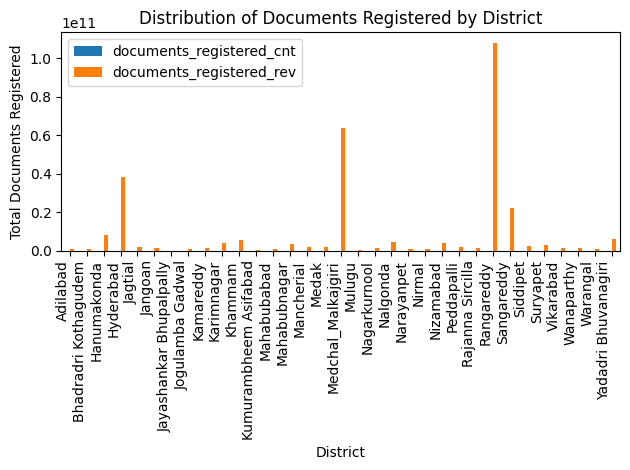

In [148]:
# Create a bar plot for the distribution of documents registered across districts
plt.figure(figsize=(10, 6))
district_grouped.plot(kind='bar')
plt.title('Distribution of Documents Registered by District')
plt.xlabel('District')
plt.ylabel('Total Documents Registered')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [149]:
# Group by district and calculate the sum of revenue generated for each district
revenue_grouped = merged_stamp_reg.groupby('district')['documents_registered_rev'].sum()

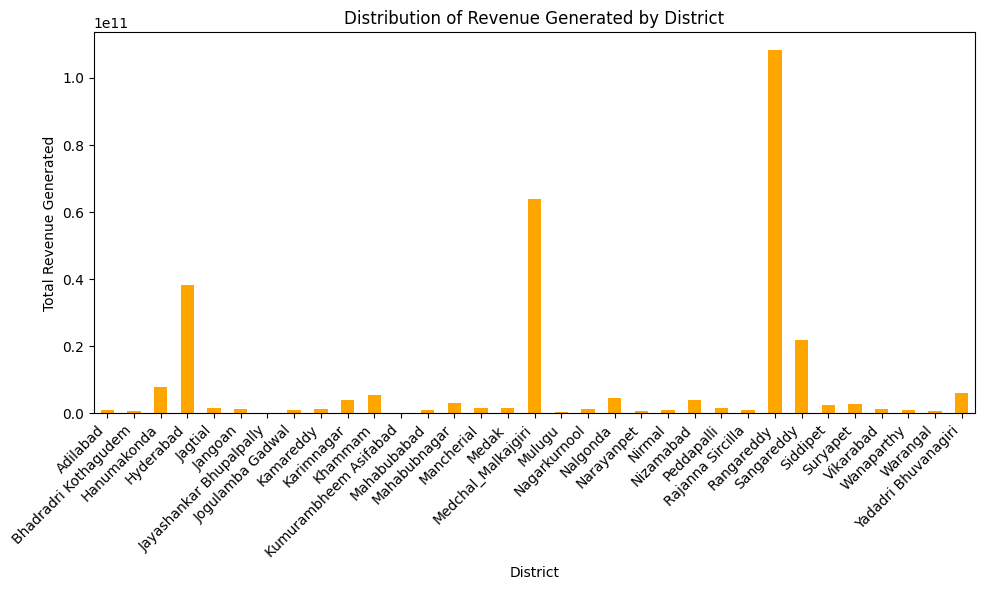

In [150]:
# Create a bar plot for the distribution of revenue generated across districts
plt.figure(figsize=(10, 6))
revenue_grouped.plot(kind='bar', color='orange')
plt.title('Distribution of Revenue Generated by District')
plt.xlabel('District')
plt.ylabel('Total Revenue Generated')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [151]:
# Group by month and calculate the sum of documents registered and revenue for each month
monthly_grouped = merged_stamp_reg.groupby(merged_stamp_reg['fiscal_year'].dt.to_period('M'))[['documents_registered_cnt', 'documents_registered_rev']].sum()

In [152]:
monthly_grouped

,documents_registered_cnt,documents_registered_rev
fiscal_year,,
2019-04,1614417.0,6.241077e+10
2020-04,943893.0,4.204711e+10
2021-04,1104580.0,8.407598e+10
2022-04,1207073.0,1.066954e+11


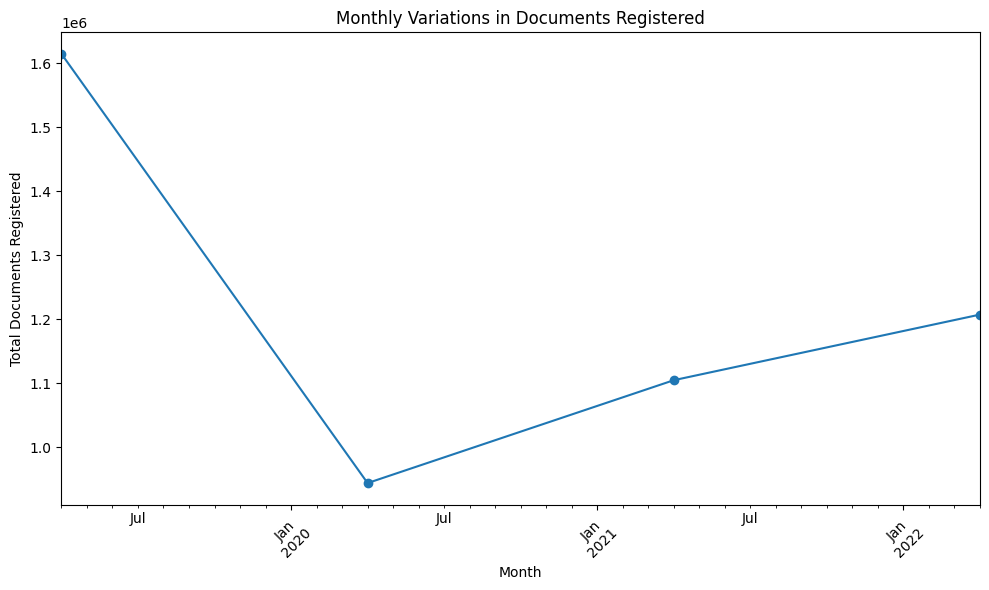

In [153]:
# Create a line plot for the monthly variations in documents registered
plt.figure(figsize=(10, 6))
monthly_grouped['documents_registered_cnt'].plot(marker='o')
plt.title('Monthly Variations in Documents Registered')
plt.xlabel('Month')
plt.ylabel('Total Documents Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

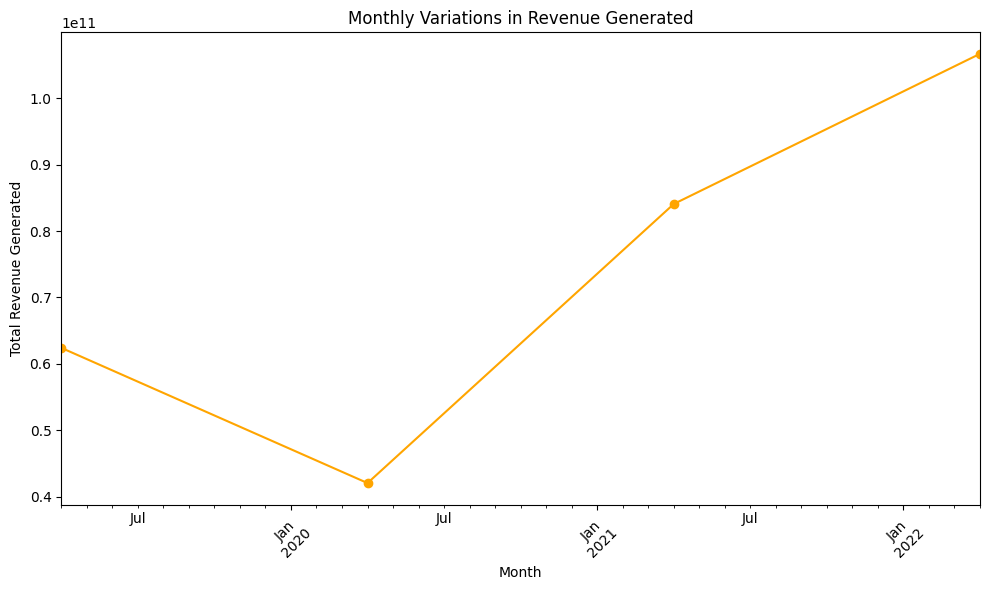

In [154]:
# Create a line plot for the monthly variations in revenue generated
plt.figure(figsize=(10, 6))
monthly_grouped['documents_registered_rev'].plot(marker='o', color='orange')
plt.title('Monthly Variations in Revenue Generated')
plt.xlabel('Month')
plt.ylabel('Total Revenue Generated')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [155]:
# Select the columns of interest
stamp_interest = ['documents_registered_cnt', 'documents_registered_rev', 'estamps_challans_cnt', 'estamps_challans_rev']

# Calculate the correlation matrix
correlation_matrix = merged_stamp_reg[stamp_interest].corr()

# Display the correlation matrix
print(correlation_matrix)

                          documents_registered_cnt  documents_registered_rev  \
documents_registered_cnt                  1.000000                  0.873456   
documents_registered_rev                  0.873456                  1.000000   
estamps_challans_cnt                      0.672557                  0.811366   
estamps_challans_rev                      0.676699                  0.906739   

                          estamps_challans_cnt  estamps_challans_rev  
documents_registered_cnt              0.672557              0.676699  
documents_registered_rev              0.811366              0.906739  
estamps_challans_cnt                  1.000000              0.920630  
estamps_challans_rev                  0.920630              1.000000  


In [156]:
# Determine if there's a strong correlation between documents_registered_cnt and documents_registered_rev
correlation_documents = correlation_matrix.loc['documents_registered_cnt', 'documents_registered_rev']
print(f"Correlation between documents_registered_cnt and documents_registered_rev: {correlation_documents}")

Correlation between documents_registered_cnt and documents_registered_rev: 0.8734557776073607


A positive correlation between documents_registered_cnt and documents_registered_rev indicates that as the number of documents registered increases, the revenue generated also tends to increase.

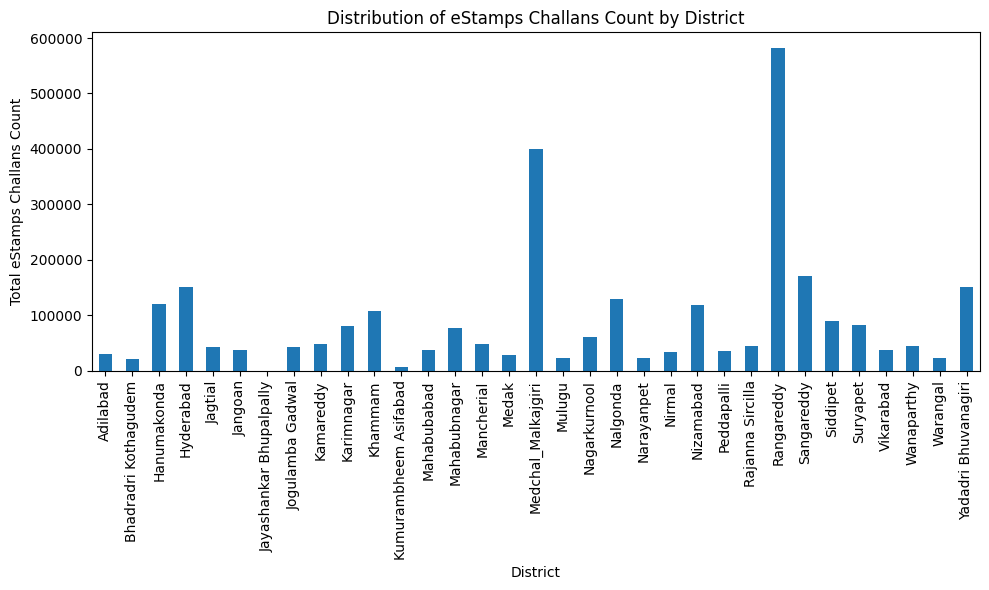

In [157]:
# Group by district and calculate the sum of eStamps challans count and revenue for each district
challans_grouped = merged_stamp_reg.groupby('district')[['estamps_challans_cnt', 'estamps_challans_rev']].sum()

# Create a bar plot for the distribution of eStamps challans count across districts
plt.figure(figsize=(10, 6))
challans_grouped['estamps_challans_cnt'].plot(kind='bar')
plt.title('Distribution of eStamps Challans Count by District')
plt.xlabel('District')
plt.ylabel('Total eStamps Challans Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

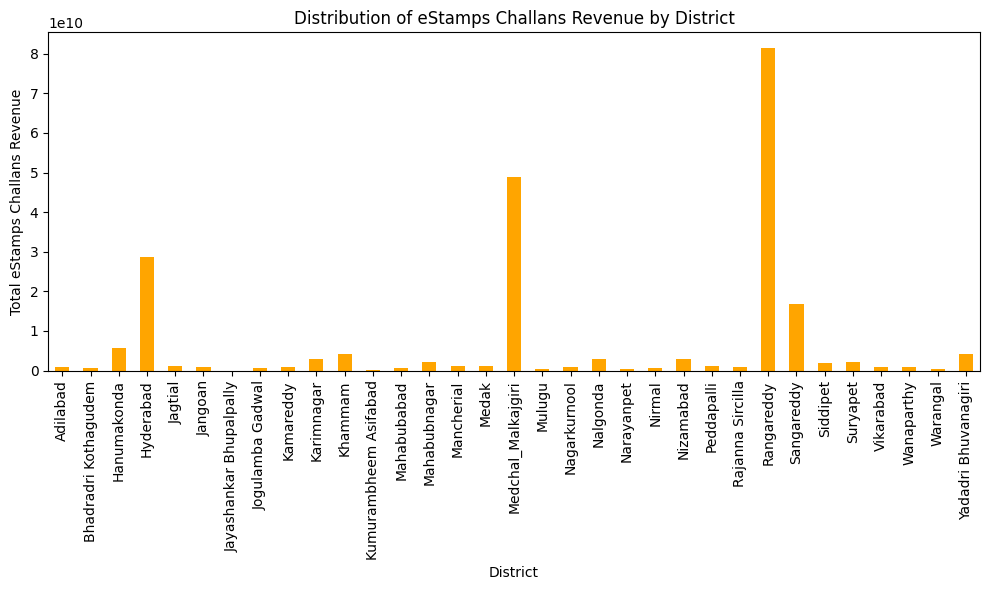

In [158]:
# Create a bar plot for the distribution of eStamps challans revenue across districts
plt.figure(figsize=(10, 6))
challans_grouped['estamps_challans_rev'].plot(kind='bar', color='orange')
plt.title('Distribution of eStamps Challans Revenue by District')
plt.xlabel('District')
plt.ylabel('Total eStamps Challans Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [159]:
# Calculate the percentage of revenue contributed by eStamps challans for each district
challans_grouped['challans_rev_percentage'] = (challans_grouped['estamps_challans_rev'] / merged_stamp_reg['documents_registered_rev'].sum()) * 100

# Sort the districts by the percentage of revenue contributed by eStamps challans
sorted_districts_by_percentage = challans_grouped.sort_values(by='challans_rev_percentage', ascending=False)

# Print the sorted districts and their corresponding percentage contribution
print(sorted_districts_by_percentage[['challans_rev_percentage']])

                         challans_rev_percentage
district                                        
Rangareddy                             27.550450
Medchal_Malkajgiri                     16.536087
Hyderabad                               9.705134
Sangareddy                              5.659405
Hanumakonda                             1.948017
Yadadri Bhuvanagiri                     1.441046
Khammam                                 1.425411
Nizamabad                               1.032111
Nalgonda                                1.019309
Karimnagar                              1.012456
Mahabubnagar                            0.757689
Suryapet                                0.708905
Siddipet                                0.659671
Peddapalli                              0.430536
Medak                                   0.423589
Mancherial                              0.422337
Jagtial                                 0.407351
Vikarabad                               0.337168
Kamareddy           

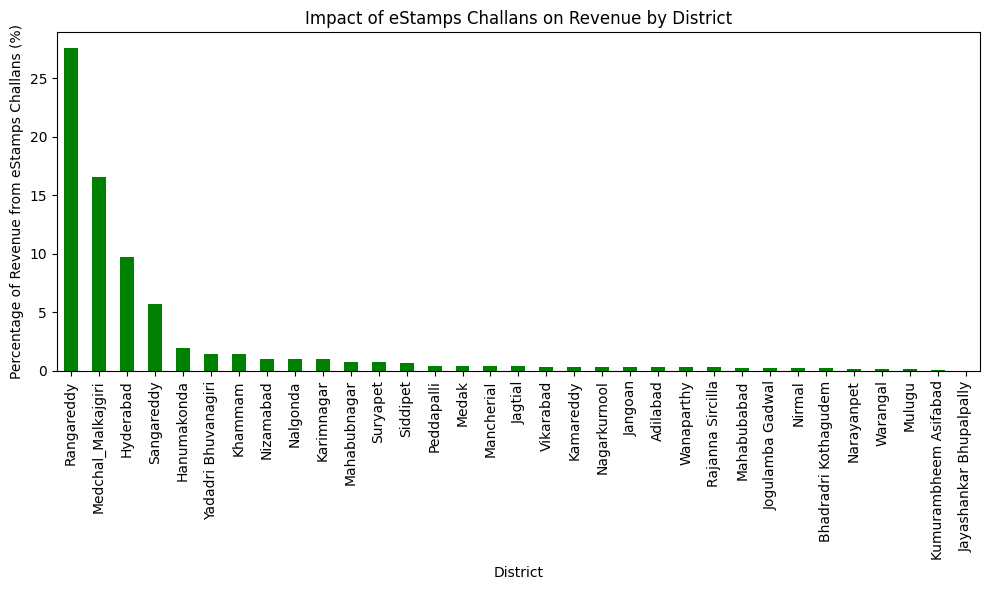

In [160]:
# Create a bar plot for the impact of eStamps challans on revenue by district
plt.figure(figsize=(10, 6))
sorted_districts_by_percentage['challans_rev_percentage'].plot(kind='bar', color='green')
plt.title('Impact of eStamps Challans on Revenue by District')
plt.xlabel('District')
plt.ylabel('Percentage of Revenue from eStamps Challans (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

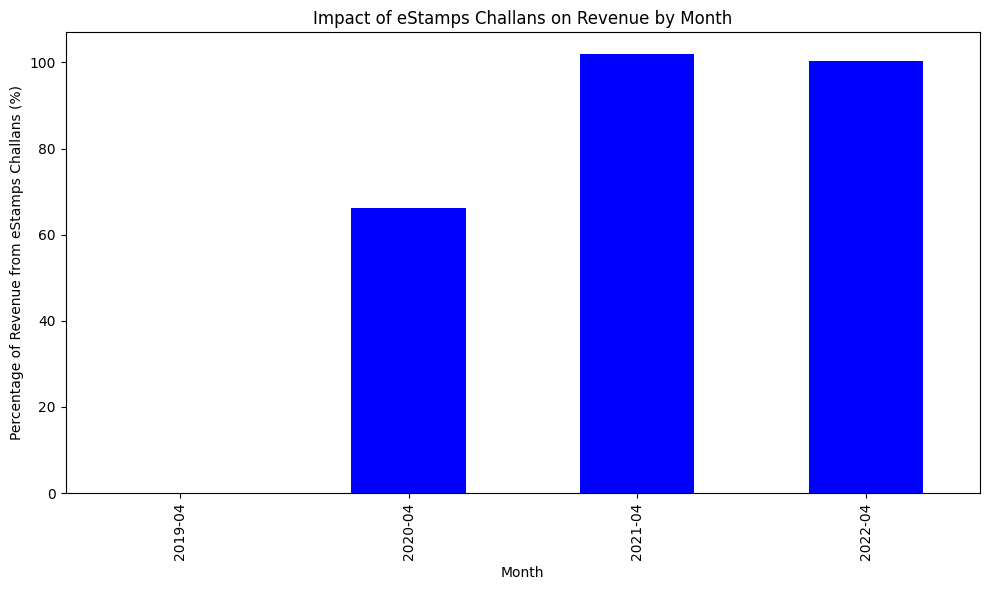

In [161]:
# Group by month and calculate the sum of eStamps challans revenue and total revenue for each month
monthly_challans_grouped = merged_stamp_reg.groupby(merged_stamp_reg['fiscal_year'].dt.to_period('M'))[['estamps_challans_rev', 'documents_registered_rev']].sum()

# Calculate the percentage of revenue contributed by eStamps challans for each month
monthly_challans_grouped['challans_rev_percentage'] = (monthly_challans_grouped['estamps_challans_rev'] / monthly_challans_grouped['documents_registered_rev']) * 100

# Create a bar plot for the impact of eStamps challans on revenue by month
plt.figure(figsize=(10, 6))
monthly_challans_grouped['challans_rev_percentage'].plot(kind='bar', color='blue')
plt.title('Impact of eStamps Challans on Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Percentage of Revenue from eStamps Challans (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [162]:
# Group by district and calculate the sum of documents registered and revenue for each district and month
district_monthly_grouped = merged_stamp_reg.groupby(['district', merged_stamp_reg['fiscal_year'].dt.to_period('M')])[
    ['documents_registered_cnt', 'documents_registered_rev']
].sum()


In [163]:
district_monthly_grouped

documents_registered_cnt  \
district             fiscal_year                             
Adilabad             2019-04                       12552.0   
                     2020-04                       10530.0   
                     2021-04                       11031.0   
                     2022-04                       11112.0   
Bhadradri Kothagudem 2019-04                        7488.0   
...                                                    ...   
Warangal             2022-04                        9874.0   
Yadadri Bhuvanagiri  2019-04                       96719.0   
                     2020-04                       44385.0   
                     2021-04                       58979.0   
                     2022-04                       62084.0   

                                  documents_registered_rev  
district             fiscal_year                            
Adilabad             2019-04                  1.780822e+08  
                     2020-04                  1.679629e+08  
                     2021-04                  3.240855e+08  
                     2022-04                  3.968408e+08  
Bhadradri Kothagudem 2019-04                  1.624669e+08  
...                                                    ...  
Warangal             2022-04                  2.522781e+08  
Yadadri Bhuvanagiri  2019-04                  1.419787e+09  
                     2020-04                  7.668871e+08  
                     2021-04                  1.619590e+09  
                     2022-04                  2.167481e+09  

[128 rows x 2 columns]

In [164]:
# Reset the index for further calculations
district_monthly_grouped = district_monthly_grouped.reset_index()

In [165]:
# Calculate the growth rate for documents registered and revenue generated
district_monthly_grouped['documents_growth_rate'] = (
    district_monthly_grouped.groupby('district')['documents_registered_cnt']
    .pct_change()
    .fillna(0)
    * 100
)

In [166]:
district_monthly_grouped['revenue_growth_rate'] = (
    district_monthly_grouped.groupby('district')['documents_registered_rev']
    .pct_change()
    .fillna(0)
    * 100
)

In [167]:
district_monthly_grouped

,district,fiscal_year,documents_registered_cnt,documents_registered_rev,documents_growth_rate,revenue_growth_rate
0,Adilabad,2019-04,12552.0,1.780822e+08,0.000000,0.000000
1,Adilabad,2020-04,10530.0,1.679629e+08,-16.108987,-5.682408
2,Adilabad,2021-04,11031.0,3.240855e+08,4.757835,92.950699
3,Adilabad,2022-04,11112.0,3.968408e+08,0.734294,22.449415
4,Bhadradri Kothagudem,2019-04,7488.0,1.624669e+08,0.000000,0.000000
...,...,...,...,...,...,...
123,Warangal,2022-04,9874.0,2.522781e+08,25.225111,44.856600
124,Yadadri Bhuvanagiri,2019-04,96719.0,1.419787e+09,0.000000,0.000000
125,Yadadri Bhuvanagiri,2020-04,44385.0,7.668871e+08,-54.109327,-45.985749
126,Yadadri Bhuvanagiri,2021-04,58979.0,1.619590e+09,32.880478,111.190192


In [168]:
# Assuming we want to identify districts with the highest growth and those that need attention

# Calculate the average growth rates for each district
average_growth_rates = district_monthly_grouped.groupby('district')[
    ['documents_growth_rate', 'revenue_growth_rate']
].mean()

# Sort the districts by average growth rate and print
sorted_districts_by_growth = average_growth_rates.sort_values(
    by=['documents_growth_rate', 'revenue_growth_rate'], ascending=False
)


In [169]:
sorted_districts_by_growth.head()

,documents_growth_rate,revenue_growth_rate
district,,
Mulugu,7.017920,36.234892
Hyderabad,6.328564,26.025818
Mancherial,4.515743,25.027967
Medchal_Malkajgiri,4.274797,25.541625
Bhadradri Kothagudem,1.773493,22.147357


In [170]:
sorted_districts_by_growth.tail(10)

,documents_growth_rate,revenue_growth_rate
district,,
Khammam,-8.199457,21.733173
Nagarkurnool,-8.628961,24.491722
Vikarabad,-9.132612,28.419684
Wanaparthy,-9.461027,27.565123
Jogulamba Gadwal,-9.655468,15.797583
Nalgonda,-9.970025,8.559686
Medak,-11.288632,29.327117
Kumurambheem Asifabad,-13.331910,15.696763
Narayanpet,-14.314115,23.091804


In [171]:
# Calculate the percentage change in documents registered and revenue compared to the previous month
monthly_grouped['documents_registered_change'] = monthly_grouped['documents_registered_cnt'].pct_change() * 100
monthly_grouped['revenue_change'] = monthly_grouped['documents_registered_rev'].pct_change() * 100

# Print the DataFrame with changes
monthly_grouped

,documents_registered_cnt,documents_registered_rev,documents_registered_change,revenue_change
fiscal_year,,,,
2019-04,1614417.0,6.241077e+10,NaN,NaN
2020-04,943893.0,4.204711e+10,-41.533507,-32.628437
2021-04,1104580.0,8.407598e+10,17.023858,99.956600
2022-04,1207073.0,1.066954e+11,9.278911,26.903552


Comparison with Previous Periods - Yearly Analysis:

In [172]:
# Group by year and calculate the sum of documents registered and revenue for each year
yearly_grouped = merged_stamp_reg.groupby(merged_stamp_reg['fiscal_year'].dt.to_period('Y'))[['documents_registered_cnt', 'documents_registered_rev']].sum()

# Calculate the percentage change in documents registered and revenue compared to the previous year
yearly_grouped['documents_registered_change'] = yearly_grouped['documents_registered_cnt'].pct_change() * 100
yearly_grouped['revenue_change'] = yearly_grouped['documents_registered_rev'].pct_change() * 100

# Print the DataFrame with changes
yearly_grouped

,documents_registered_cnt,documents_registered_rev,documents_registered_change,revenue_change
fiscal_year,,,,
2019,1614417.0,6.241077e+10,NaN,NaN
2020,943893.0,4.204711e+10,-41.533507,-32.628437
2021,1104580.0,8.407598e+10,17.023858,99.956600
2022,1207073.0,1.066954e+11,9.278911,26.903552


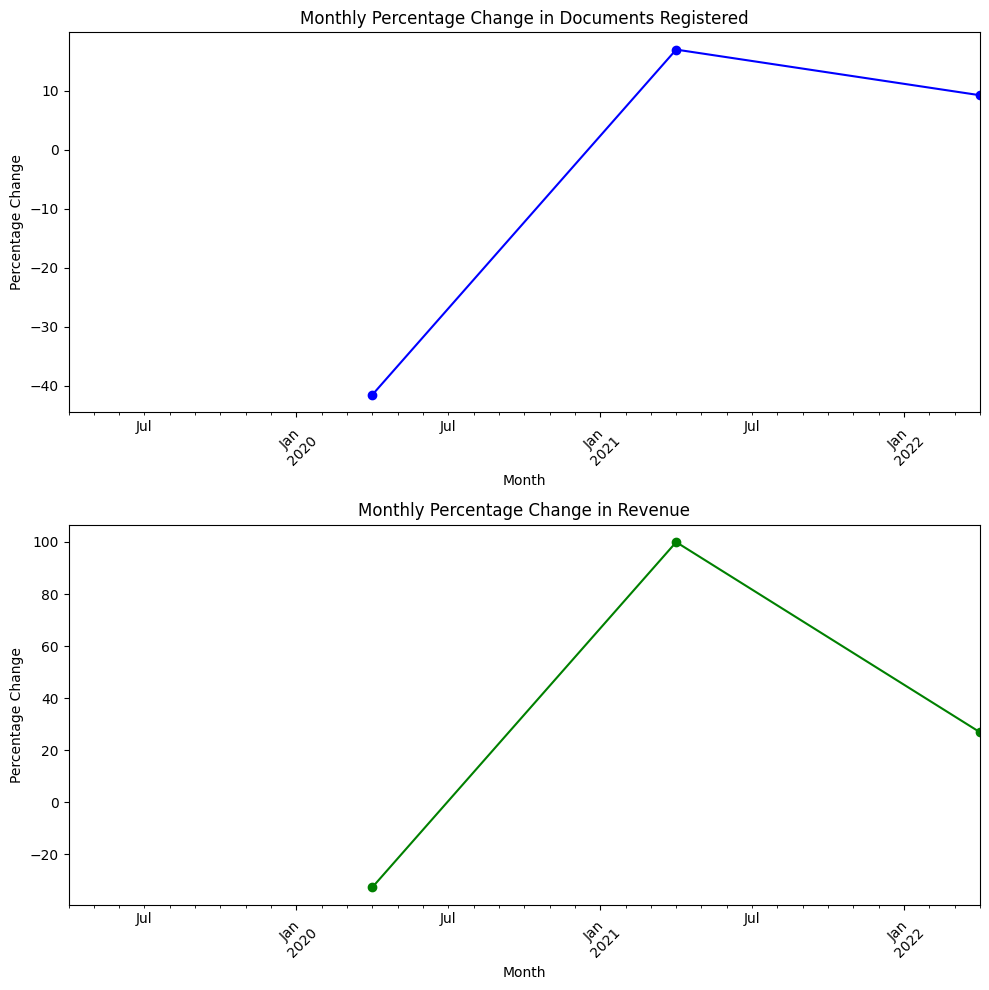

In [173]:
# Create subplots for the comparison with previous periods - Monthly Analysis
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot percentage change in documents registered
monthly_grouped['documents_registered_change'].plot(ax=axes[0], marker='o', color='blue')
axes[0].set_title('Monthly Percentage Change in Documents Registered')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Percentage Change')
axes[0].xaxis.set_tick_params(rotation=45)

# Plot percentage change in revenue
monthly_grouped['revenue_change'].plot(ax=axes[1], marker='o', color='green')
axes[1].set_title('Monthly Percentage Change in Revenue')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Percentage Change')
axes[1].xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()

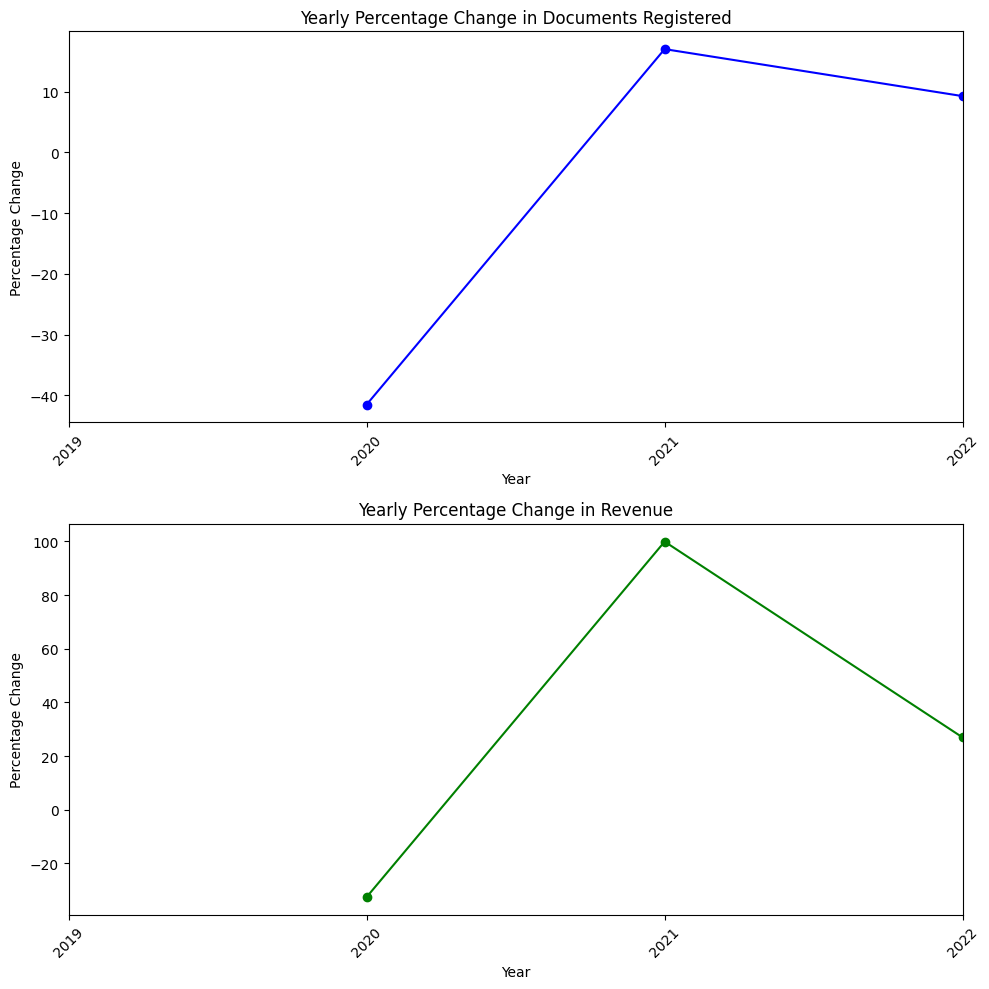

In [174]:
# Create subplots for the comparison with previous periods - Yearly Analysis
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot percentage change in documents registered
yearly_grouped['documents_registered_change'].plot(ax=axes[0], marker='o', color='blue')
axes[0].set_title('Yearly Percentage Change in Documents Registered')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Percentage Change')
axes[0].xaxis.set_tick_params(rotation=45)

# Plot percentage change in revenue
yearly_grouped['revenue_change'].plot(ax=axes[1], marker='o', color='green')
axes[1].set_title('Yearly Percentage Change in Revenue')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Percentage Change')
axes[1].xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()

In [175]:
import geopandas as gpd

<Figure size 1200x800 with 0 Axes>

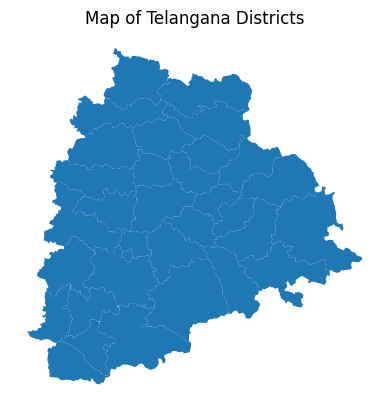

In [176]:
districts_geo = gpd.read_file(r'D:\C7 Input Files\telangana_district_map.json')

# Plot the districts on a map
plt.figure(figsize=(12, 8))
districts_geo.plot()
plt.title('Map of Telangana Districts')
plt.axis('off')  # Turn off the axis
plt.show()

In [177]:
districts_geo.head()

,id,OBJECTID,New_Distri,Shape_Leng,Shape_Area,area,Dist_Name,geometry
0,NaN,1,Adilabad,3.688097,0.342293,3977.064388,Adilabad,"POLYGON ((78.94066 19.55213, 78.94900 19.53404..."
1,NaN,2,Bhadradri Kothagudem,5.811019,0.594426,6979.436918,Bhadradri Kothagudem,"POLYGON ((80.91944 17.21945, 80.89342 17.22226..."
2,NaN,3,Hanumakonda,2.554182,0.141159,1654.041691,Hanumakonda,"POLYGON ((79.84381 18.15975, 79.85482 18.14728..."
3,NaN,4,Hyderabad,1.045469,0.015515,182.457101,Hyderabad,"POLYGON ((78.51561 17.37721, 78.52095 17.35756..."
4,NaN,5,Jagtial,2.739430,0.244449,2851.813247,Jagtial,"POLYGON ((79.29765 18.81822, 79.29464 18.80076..."


In [178]:
districts_geo.rename(columns={'Dist_Name': 'district'}, inplace=True)

In [179]:
merged_data = districts_geo.merge(merged_stamp_reg, left_on='district', right_on='district', how='left')

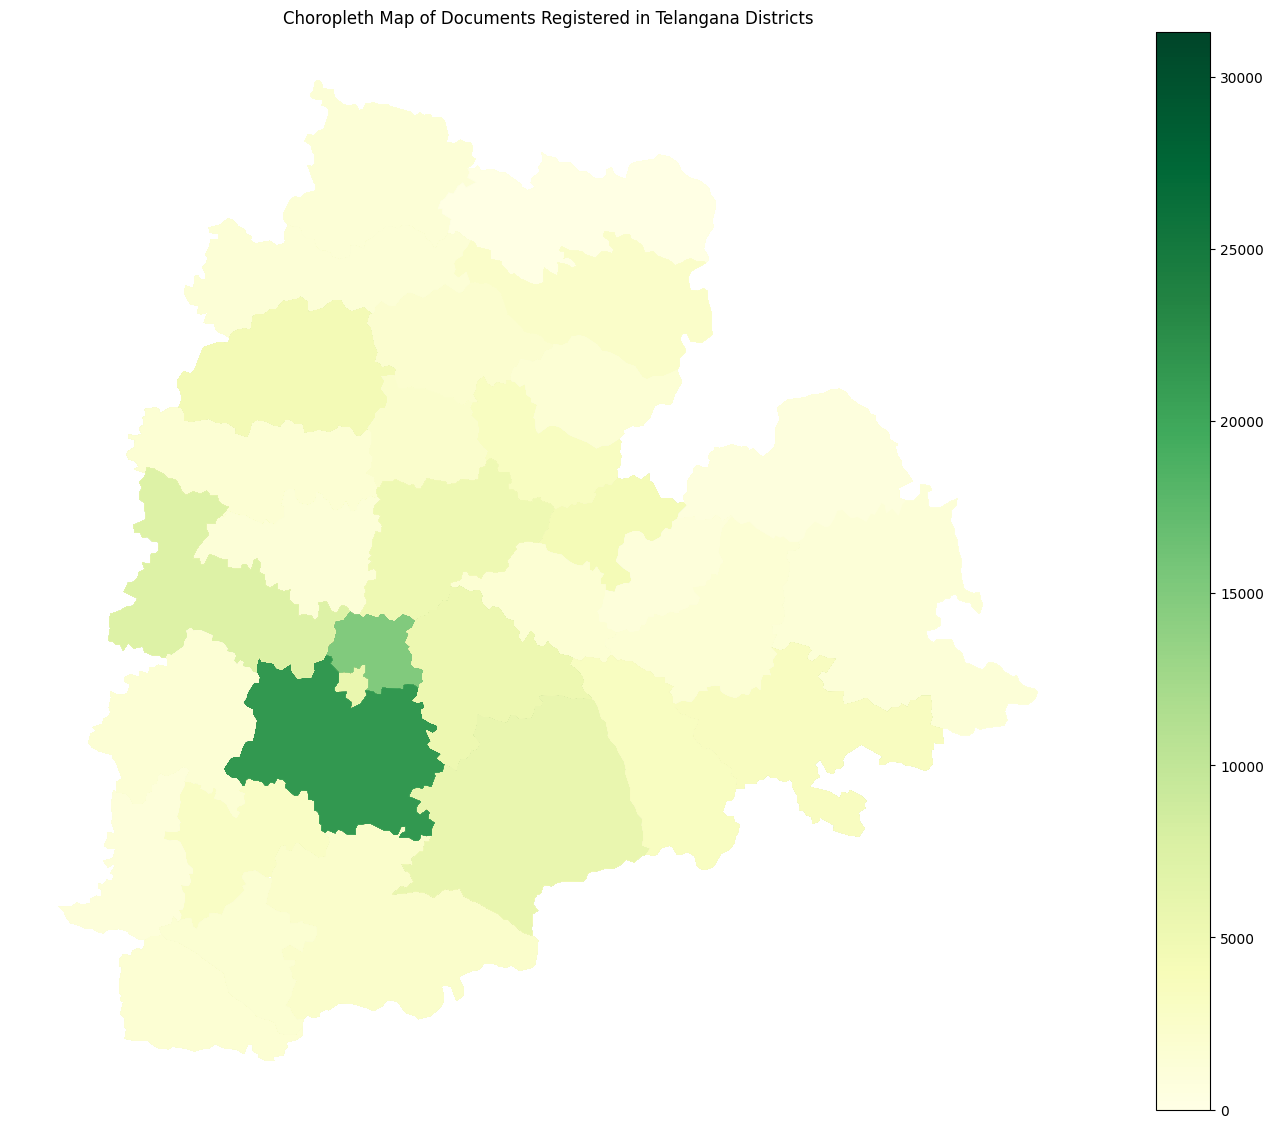

In [180]:
# Plot a choropleth map of documents registered
merged_data.plot(column='documents_registered_cnt', cmap='YlGn', legend=True,figsize=(18, 14))
plt.title('Choropleth Map of Documents Registered in Telangana Districts')
plt.axis('off')
plt.show()

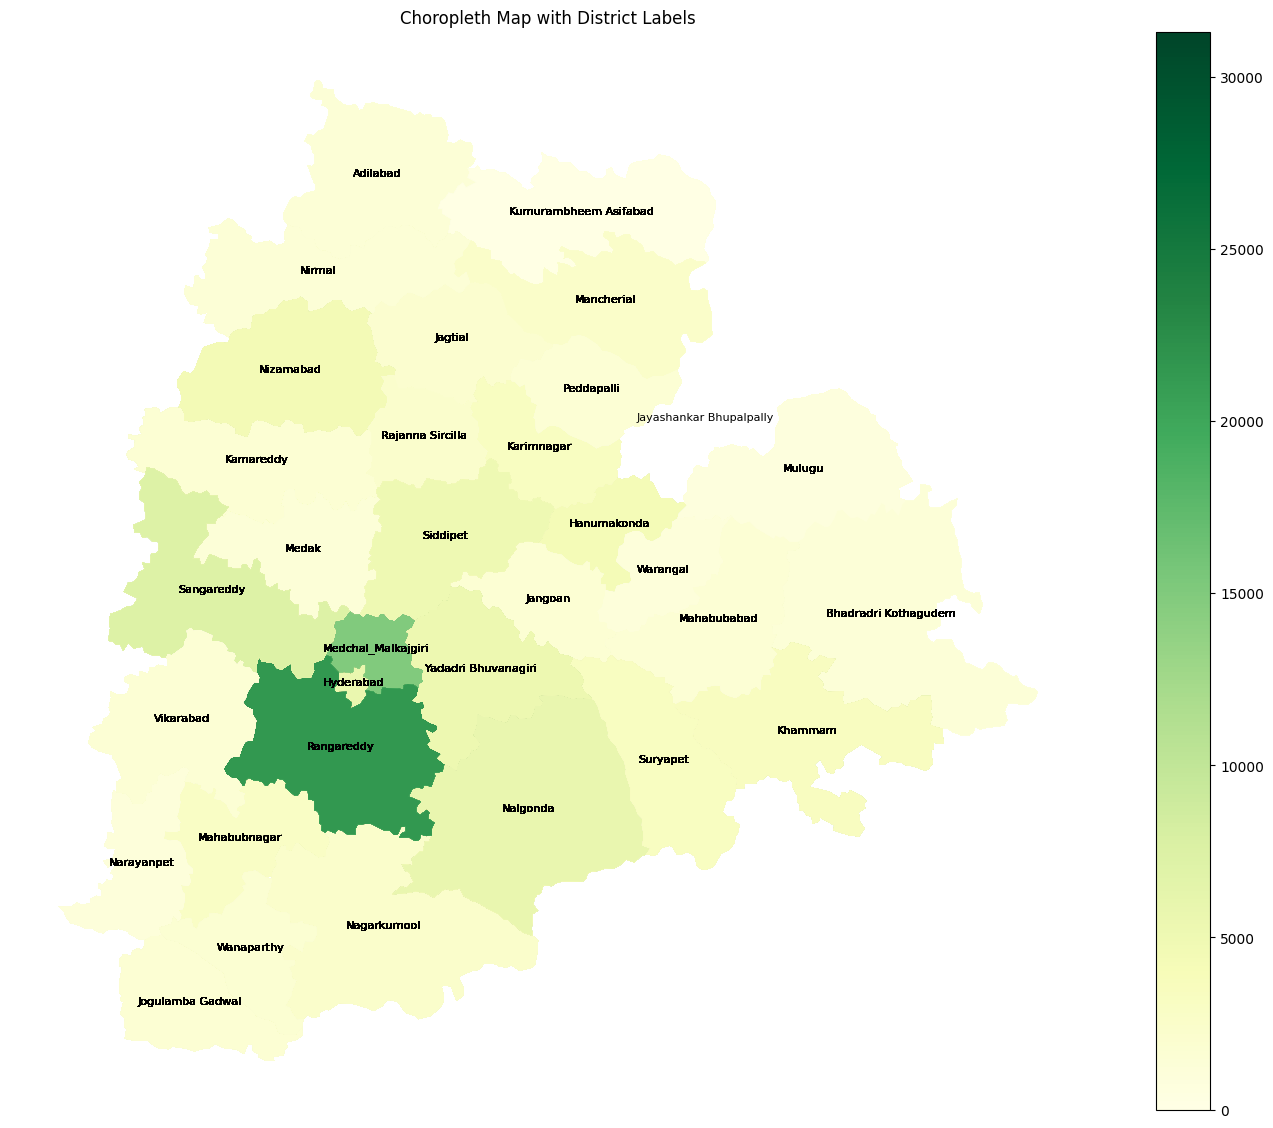

In [181]:

ax = merged_data.plot(column='documents_registered_cnt', cmap='YlGn', legend=True,figsize=(18, 14))
merged_data.apply(lambda x: ax.annotate(text=x.district, xy=x.geometry.centroid.coords[0], fontsize=8, ha='center'), axis=1)
plt.title('Choropleth Map with District Labels')
plt.axis('off')
plt.show()

In [182]:
# Filter data for the desired period
start_date = pd.Timestamp('2019-04-01')
end_date = pd.Timestamp('2023-04-01')
filtered_data = merged_stamp_reg[(merged_stamp_reg['fiscal_year'] >= start_date) & (merged_stamp_reg['fiscal_year'] <= end_date)]

In [184]:
# Group by district and calculate the total revenue for each district
revenue_by_district = filtered_data.groupby('district')[['documents_registered_rev']].sum()
revenue_by_district

,documents_registered_rev
district,
Adilabad,1.066971e+09
Bhadradri Kothagudem,8.247127e+08
Hanumakonda,7.927494e+09
Hyderabad,3.839674e+10
Jagtial,1.666081e+09
Jangoan,1.329899e+09
Jogulamba Gadwal,9.787797e+08
Kamareddy,1.396196e+09
Karimnagar,4.024475e+09


In [185]:
# Calculate revenue growth for each district
revenue_growth = revenue_by_district.pct_change() * 100

In [186]:
# Sort districts by revenue growth in descending order
top_growth_districts = revenue_growth.sort_values(by='documents_registered_rev', ascending=False).head(5)

In [187]:
top_growth_districts

,documents_registered_rev
district,
Rangareddy,9155.420571
Medchal_Malkajgiri,3528.559173
Hanumakonda,861.243161
Yadadri Bhuvanagiri,709.075928
Hyderabad,384.349070


In [188]:
# Filter data for FY 2022
start_date = pd.Timestamp('2022-04-01')
end_date = pd.Timestamp('2023-03-31')
filtered_data = merged_stamp_reg[(merged_stamp_reg['fiscal_year'] >= start_date) & (merged_stamp_reg['fiscal_year'] <= end_date)]

In [189]:
# Group by district and calculate the total revenue for documents and e-stamps
revenue_by_district = filtered_data.groupby('district')[['documents_registered_rev', 'estamps_challans_rev']].sum()

In [190]:
revenue_by_district

,documents_registered_rev,estamps_challans_rev
district,,
Adilabad,3.968408e+08,3.904060e+08
Bhadradri Kothagudem,2.926434e+08,2.863431e+08
Hanumakonda,2.817239e+09,2.846857e+09
Hyderabad,1.426601e+10,1.437432e+10
Jagtial,6.288985e+08,6.356170e+08
Jangoan,4.737265e+08,4.857701e+08
Jogulamba Gadwal,3.289692e+08,3.319194e+08
Kamareddy,4.716294e+08,4.791942e+08
Karimnagar,1.550449e+09,1.555554e+09


In [191]:
# Calculate the proportion of e-stamps revenue to total revenue
revenue_by_district['estamps_proportion'] = (revenue_by_district['estamps_challans_rev'] / (revenue_by_district['documents_registered_rev'] + revenue_by_district['estamps_challans_rev'])) * 100

In [192]:
# Sort districts by the proportion of e-stamps revenue in descending order
top_estamps_contributing_districts = revenue_by_district.sort_values(by='estamps_proportion', ascending=False).head(5)

In [193]:
top_estamps_contributing_districts

,documents_registered_rev,estamps_challans_rev,estamps_proportion
district,,,
Jangoan,4.737265e+08,4.857701e+08,50.627603
Nirmal,3.385837e+08,3.456791e+08,50.518470
Mancherial,6.488937e+08,6.617272e+08,50.489596
Rangareddy,3.769775e+10,3.834936e+10,50.428423
Kamareddy,4.716294e+08,4.791942e+08,50.397802


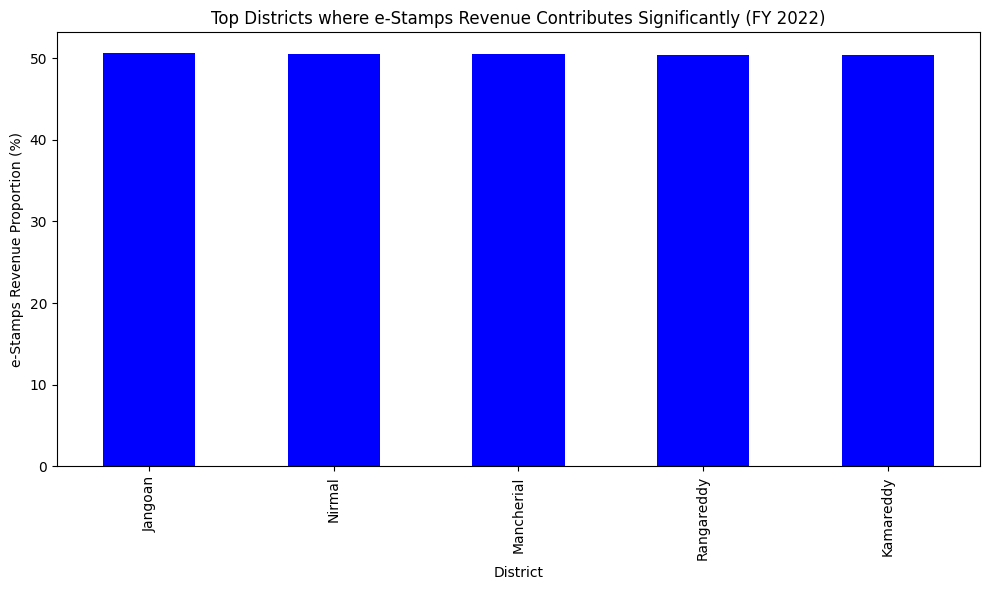

In [194]:
# Plot the top contributing districts
plt.figure(figsize=(10, 6))
top_estamps_contributing_districts['estamps_proportion'].plot(kind='bar', color='blue')
plt.title('Top Districts where e-Stamps Revenue Contributes Significantly (FY 2022)')
plt.xlabel('District')
plt.ylabel('e-Stamps Revenue Proportion (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [195]:
# Filter data for the periods before and after e-Stamp challan implementation
pre_e_stamp = merged_stamp_reg[merged_stamp_reg['fiscal_year'] < '2020-12-01']
post_e_stamp = merged_stamp_reg[merged_stamp_reg['fiscal_year'] >= '2020-12-01']

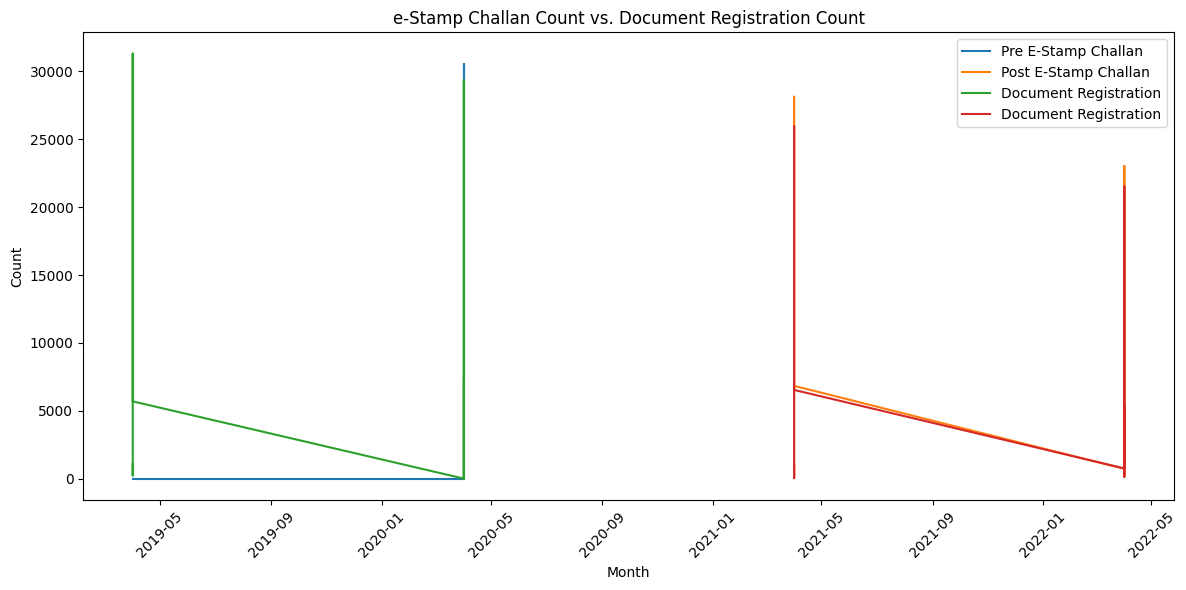

In [196]:
# Plot line charts for e-Stamp challan count and document registration count patterns
plt.figure(figsize=(12, 6))
plt.plot(pre_e_stamp['fiscal_year'], pre_e_stamp['estamps_challans_cnt'], label='Pre E-Stamp Challan')
plt.plot(post_e_stamp['fiscal_year'], post_e_stamp['estamps_challans_cnt'], label='Post E-Stamp Challan')
plt.plot(pre_e_stamp['fiscal_year'], pre_e_stamp['documents_registered_cnt'], label='Document Registration')
plt.plot(post_e_stamp['fiscal_year'], post_e_stamp['documents_registered_cnt'], label='Document Registration')
plt.title('e-Stamp Challan Count vs. Document Registration Count')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()